In [13]:
#import packages
import pandas as pd
import numpy as np

#to plot within notebook
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

#setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

#for normalizing data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

#read the file
df = pd.read_csv('C:/Users/HP/Downloads/NSE-BSE.csv')

#print the head
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,707.0,707.95,681.0,682.65,683.10,131700.0,910.52
1,2018-09-27,716.8,723.50,691.1,697.80,697.15,156222.0,1104.25
2,2018-09-26,720.0,724.40,709.0,710.00,711.60,71780.0,513.48
3,2018-09-25,725.0,725.00,710.5,715.00,718.15,93181.0,668.03
4,2018-09-24,725.3,728.00,712.0,721.00,721.90,126374.0,911.15


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 410 entries, 2018-09-28 to 2017-02-03
Data columns (total 8 columns):
Date                    410 non-null datetime64[ns]
Open                    410 non-null float64
High                    410 non-null float64
Low                     410 non-null float64
Last                    410 non-null float64
Close                   410 non-null float64
Total Trade Quantity    410 non-null float64
Turnover (Lacs)         410 non-null float64
dtypes: datetime64[ns](1), float64(7)
memory usage: 28.8 KB


In [38]:
df.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,410.000000,410.000000,410.000000,410.000000,410.000000,4.100000e+02,410.000000
mean,923.205000,931.401463,912.493537,919.244878,919.355488,2.183562e+05,2106.658537
std,108.628058,112.272549,107.728282,109.067708,109.073867,8.084570e+05,8940.810738
min,707.000000,707.950000,681.000000,682.650000,683.100000,1.270000e+04,123.550000
25%,825.000000,828.500000,814.025000,821.750000,821.562500,6.837625e+04,631.470000
50%,940.000000,948.000000,930.875000,936.375000,937.100000,1.114700e+05,943.715000
75%,1004.000000,1010.400000,995.600000,999.500000,1000.100000,1.887495e+05,1667.142500
max,1161.050000,1200.000000,1108.100000,1130.500000,1131.550000,1.577176e+07,175934.330000


In [39]:
df.shape

(410, 8)

In [41]:
df.corr()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Open,1.000000,0.994987,0.996274,0.993289,0.993813,0.090740,0.108871
High,0.994987,1.000000,0.993768,0.995530,0.995768,0.143738,0.161370
Low,0.996274,0.993768,1.000000,0.997221,0.997623,0.080227,0.099370
Last,0.993289,0.995530,0.997221,1.000000,0.999806,0.087308,0.105359
Close,0.993813,0.995768,0.997623,0.999806,1.000000,0.086542,0.104634
Total Trade Quantity,0.090740,0.143738,0.080227,0.087308,0.086542,1.000000,0.998796
Turnover (Lacs),0.108871,0.161370,0.099370,0.105359,0.104634,0.998796,1.000000


In [42]:
df.isnull().any()

Date                    False
Open                    False
High                    False
Low                     False
Last                    False
Close                   False
Total Trade Quantity    False
Turnover (Lacs)         False
dtype: bool

In [43]:
df.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,,
2017-02-09,2017-02-09,1025.0,1028.70,1007.15,1008.50,1010.05,466684.0,4738.94
2017-02-08,2017-02-08,1013.0,1034.85,998.70,1019.00,1022.60,1187116.0,12132.93
2017-02-07,2017-02-07,1030.0,1035.95,1001.30,1006.30,1006.80,1294146.0,13141.75
2017-02-06,2017-02-06,1081.0,1087.80,1023.10,1027.00,1029.20,2199600.0,23150.76
2017-02-03,2017-02-03,1085.0,1200.00,1065.10,1070.55,1069.20,15771762.0,175934.33


In [44]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Last', 'Close', 'Total Trade Quantity',
       'Turnover (Lacs)'],
      dtype='object')

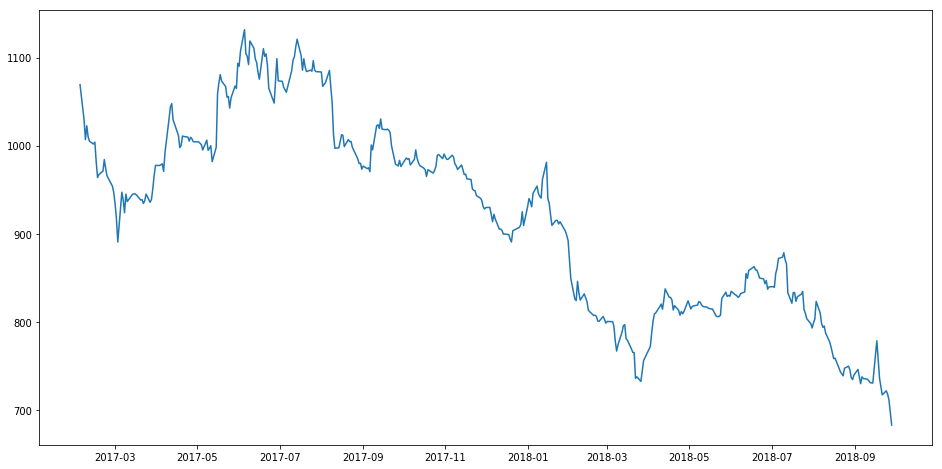

In [14]:

#setting index as date
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']

#plot
plt.figure(figsize=(16,8))
plt.plot(df['Close'], label='Close Price history')

In [15]:
#creating dataframe with date and the target variable
data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])

for i in range(0,len(data)):
     new_data['Date'][i] = data['Date'][i]
     new_data['Close'][i] = data['Close'][i]

In [16]:
#splitting into train and validation
train = new_data[:987]
valid = new_data[987:]

In [17]:
new_data.shape, train.shape, valid.shape
((1235, 2), (987, 2), (248, 2))

((1235, 2), (987, 2), (248, 2))

In [19]:
#make predictions
preds = []
for i in range(0,248):
    a = train['Close'][len(train)-248+i:].sum() + sum(preds)
    b = a/248
    preds.append(b)

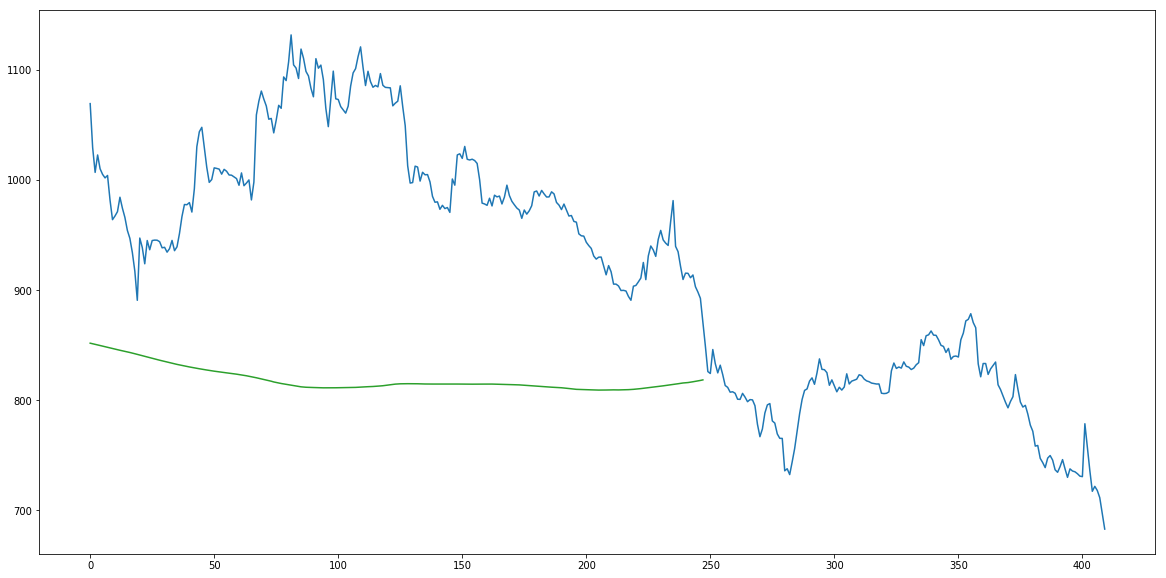

In [21]:
#plot
valid['Predictions'] = 0
valid['Predictions'] = preds
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])

In [22]:
#setting index as date values
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']

#sorting
data = df.sort_index(ascending=True, axis=0)

#creating a separate dataset
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])

for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]


In [28]:
#importing libraries
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

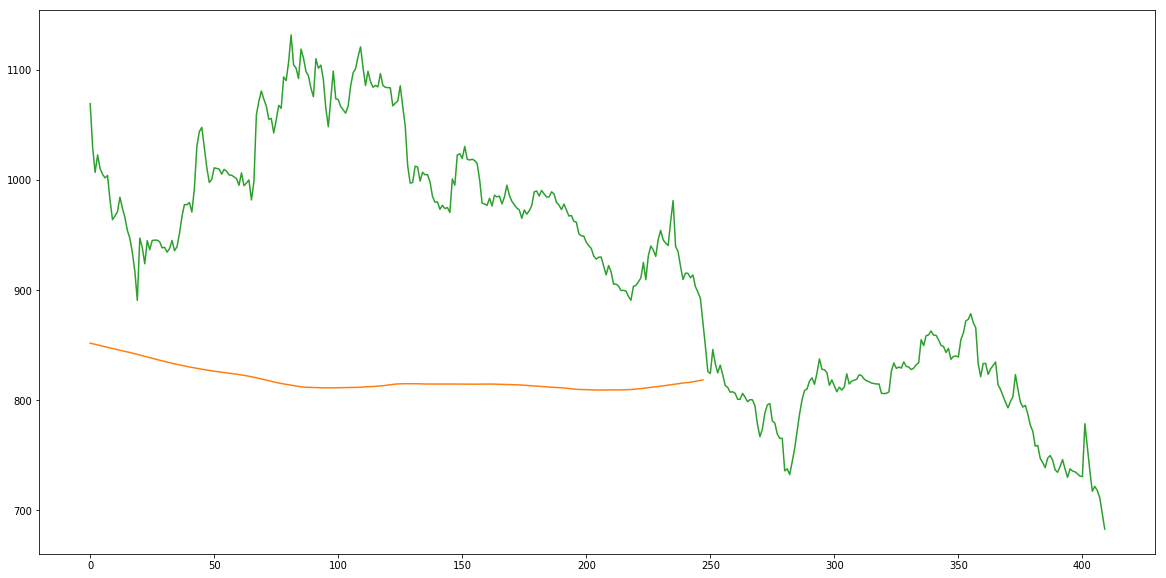

In [31]:
#plot
valid['Predictions'] = 0
valid['Predictions'] = preds
plt.plot(valid[['Close', 'Predictions']])
plt.plot(train['Close'])

NameError: name 'forecast' is not defined

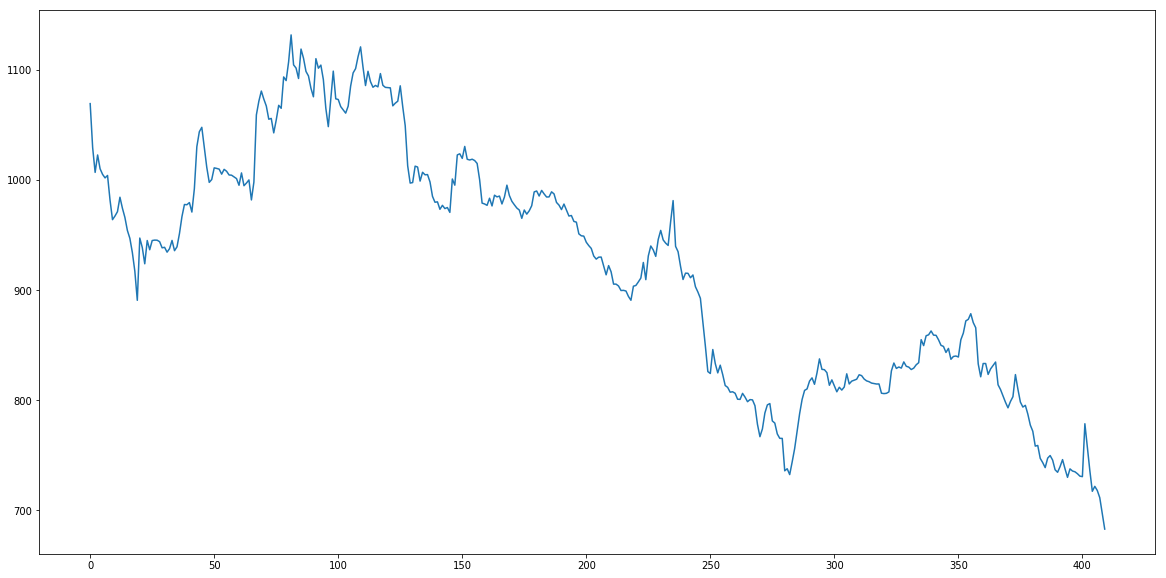

In [34]:
#plot
plt.plot(train['Close'])
plt.plot(valid['Close'])
plt.plot(forecast['Prediction'])

In [47]:
data = df.groupby('Date')['Total Trade Quantity'].max().value_counts(ascending=True)
data

86144.0       1
1240425.0     1
211552.0      1
59371.0       1
242861.0      1
75861.0       1
151276.0      1
57621.0       1
141064.0      1
68692.0       1
402076.0      1
93907.0       1
1187116.0     1
47098.0       1
192011.0      1
43625.0       1
89125.0       1
276768.0      1
101457.0      1
15771762.0    1
120420.0      1
316288.0      1
28613.0       1
70615.0       1
473438.0      1
124124.0      1
156861.0      1
97122.0       1
64198.0       1
824043.0      1
             ..
738561.0      1
57104.0       1
167750.0      1
280190.0      1
203085.0      1
69881.0       1
180061.0      1
44913.0       1
56663.0       1
194394.0      1
191065.0      1
292017.0      1
58966.0       1
101547.0      1
98207.0       1
145619.0      1
66727.0       1
50024.0       1
60555.0       1
293539.0      1
59026.0       1
74272.0       1
470176.0      1
115399.0      1
918661.0      1
66908.0       1
157007.0      1
45493.0       1
145492.0      1
38407.0       1
Name: Total Trade Quanti

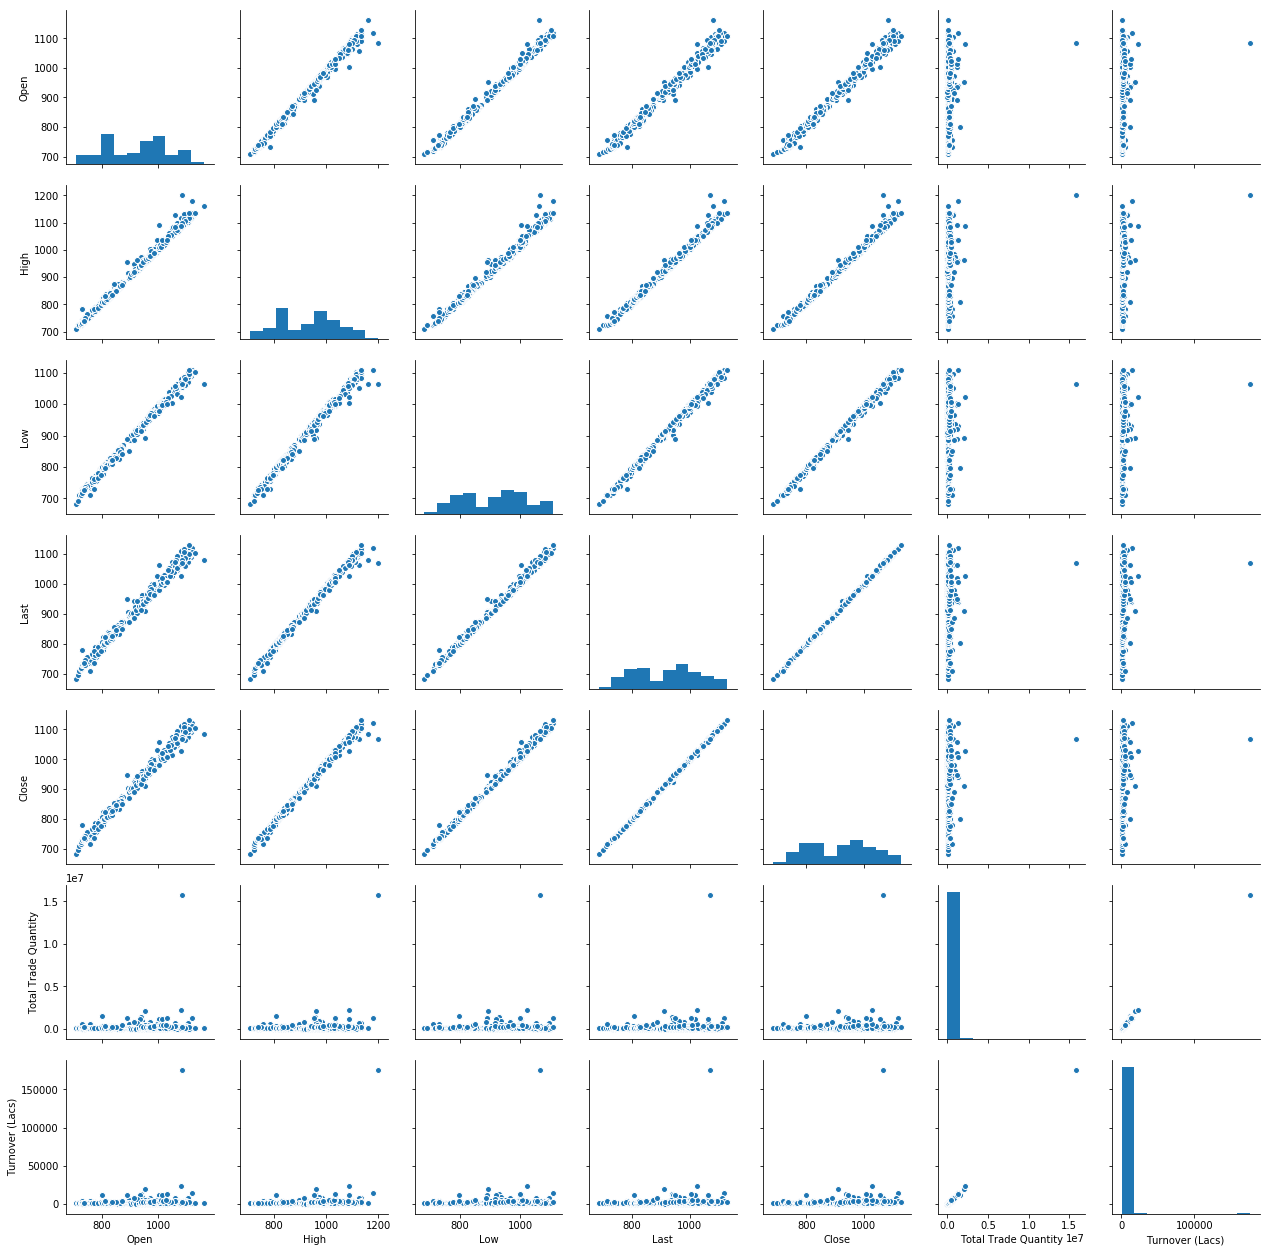

In [48]:
import seaborn as sns
sns.pairplot(df)

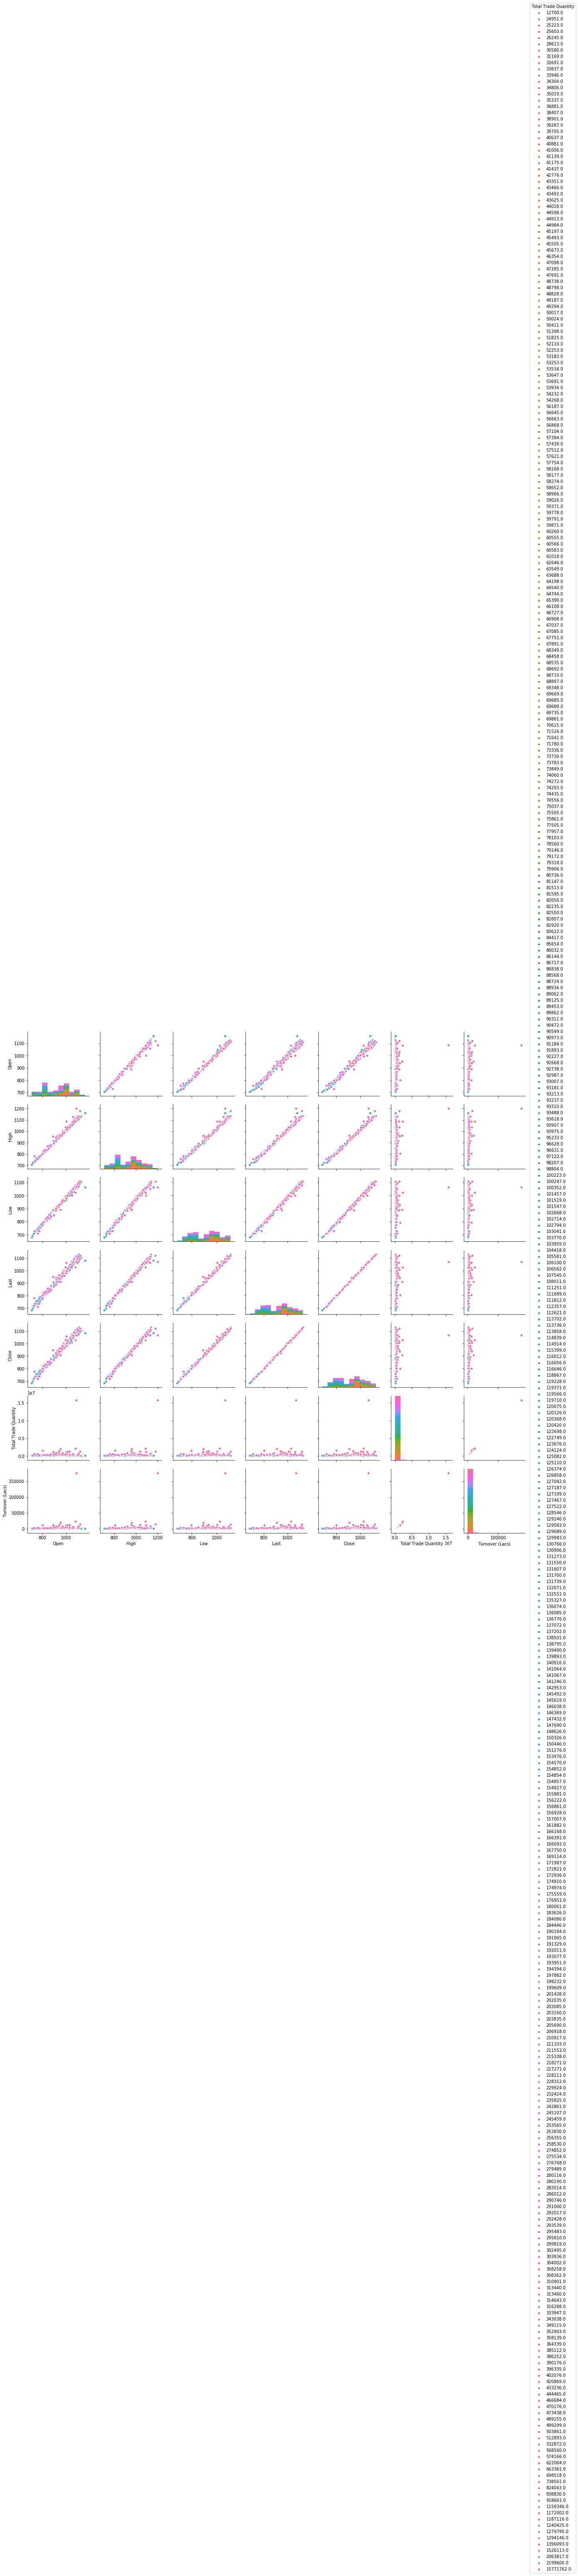

In [51]:
hari = sns.pairplot(df, hue="Total Trade Quantity")